In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
PATH = './Daten/'
train = pd.read_csv(PATH + 'train.csv', sep = ',')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
test = pd.read_csv(PATH + 'test.csv', sep = ',')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Da im Test-Datensatz keine Daten zum Überlegen ("Survived") vorhanden sind, ist dieser Datensatz für uns für supervised learning nicht brauchbar und wird daher verworfen.

Wir verwenden für den hier mit "train.csv" benannten Datensatz als Gesamtdatensatz und splitten ihn später wiederum in einen Train- und Test-Datensatz. 

In [9]:
full = train.copy()

# Betrachten des Datensatzes & Missings

In [10]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
full.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Die Anzahl der Non-Null-Werte in der Info wie auch die das Ergebnis von .isnull().sum() zeigen uns, dass in folgenden Spalten fehlende Werte enthalten zu sein scheinen:
- Age (177 Missings)
- Cabin (687 Missings)
- Embarked (2 Missings)

--> die zwei Missings in Embarked lassen sich möglicherweise inhaltlich aus der Spalte Ticket erschließen, da bei manchen Ticketnummern der Auslauf- und Einlaufhafen mit enthalten sind als Buchstabe.

--> die Anzahl der Missings in Cabin scheint zu groß, um die fehlenden Werte zu ersetzen und wird daher gedropped.

--> das Alter soll später anhand von verschiedenen Imputing-Verfahren ersetzt werden. Vermutlich schneidet dabei eine Vorhersage des Alters anhand der übrigen Features am besten ab.

In [12]:
full.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Bearbeitung des Datensatzes
## Veränderung von Spalten

In [13]:
full.Sex.replace(to_replace = {'male': 0, 'female': 1}, inplace=True)
# Die Erstellung einer Dummy-Variable für Sex ist in Pandas deutlich einfacher umsetzbar! 
# Dies hätte auch mit dem Encoder in sklearn umgesetzt werden können.

## Löschen unrelevanter Spalten/Features

In [14]:
full.loc[full['Ticket']=='LINE',:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",0,36.0,0,0,LINE,0.0,NaN,S
271,272,1,3,"Tornquist, Mr. William Henry",0,25.0,0,0,LINE,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",0,19.0,0,0,LINE,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",0,49.0,0,0,LINE,0.0,NaN,S


In Spalte "Ticket" befinden sich vier Einträge mit "LINE", diese scheinen nichts bezahlt zu haben und könnten daher Personal gewesen sein. 

Folgende Spalten werden gedropped, da sie vermutlich keinen Vorhersagewert haben (Name, PassengerID, Ticket) bzw. zu viele Missings besitzen (Cabin):

In [15]:
full.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [16]:
full

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S
887,1,1,1,19.0,0,0,30.0000,S
888,0,3,1,NaN,1,2,23.4500,S
889,1,1,0,26.0,0,0,30.0000,C


 ## Überlegungen zu neuen Spalten, von denen aus Zeitgründen abgesehen wurde:

1. Aggregation der Spalten SibSp + Parch entspräche der Anzahl der verwandten Mitreisenden. Von dieser Aggregation sehen wir ab, da hier die Information verloren ginge, ob es sich bei den Mitreisenden um Mitreisende einer anderen Generation (Parch) oder derselben Generation (SibSp) handelt. Diese könnten bei der Vorhersage der Überlebensrate relevant sein (z.B. bevorzugte Rettung von Eltern mit Kindern). Vorhersagemodelle wie bspw. die Regresssion sind jedoch in der Lage auch die Interkation dieser beiden Variablen als Vorhersagewert mit einzubeziehen. Zusätzlich eine aggregierte Spalte hinzuzunehmen bietet aufgrund hoher Interkorrelationen aus statistischer Sicht keinen Mehrwert, sondern verlangsamt vielmehr die Modelle aufgrund zusätzlicher redundanter Spalten. 

2. Aus der Spalte Name könnten folgende Information via string_split einfach extrahiert werden: 
- Nachname
- Titel (Mr., Mrs., Miss., Master., Dr.))


Hierüber könnten Rückschlüsse gezogen werden:
- ob es sich in der Spalte Parch um Kinder oder Eltern handelt
- ob es sich um ein Ehepaar handelt (bei gleichem Nachnamen und SibSp. >0)
- könnten Familien-Cluster gebildet werden, um zu ermitteln, ob große Familienverbände höhere oder niedrigere Überlebenschancen hatten.

3. Der Count der jeweils gleichen Ticket-Nummern könnten ebenfalls Auskunft über die Gruppengröße der gemeinsam Reisenden geben. Hierzu wäre es jedoch nötig, den Test-Datensatz mit einzubeziehen, da sich scheinbar dieselben Ticketnummern in beiden Datensätzen häufiger befinden. 

# Data Exploration

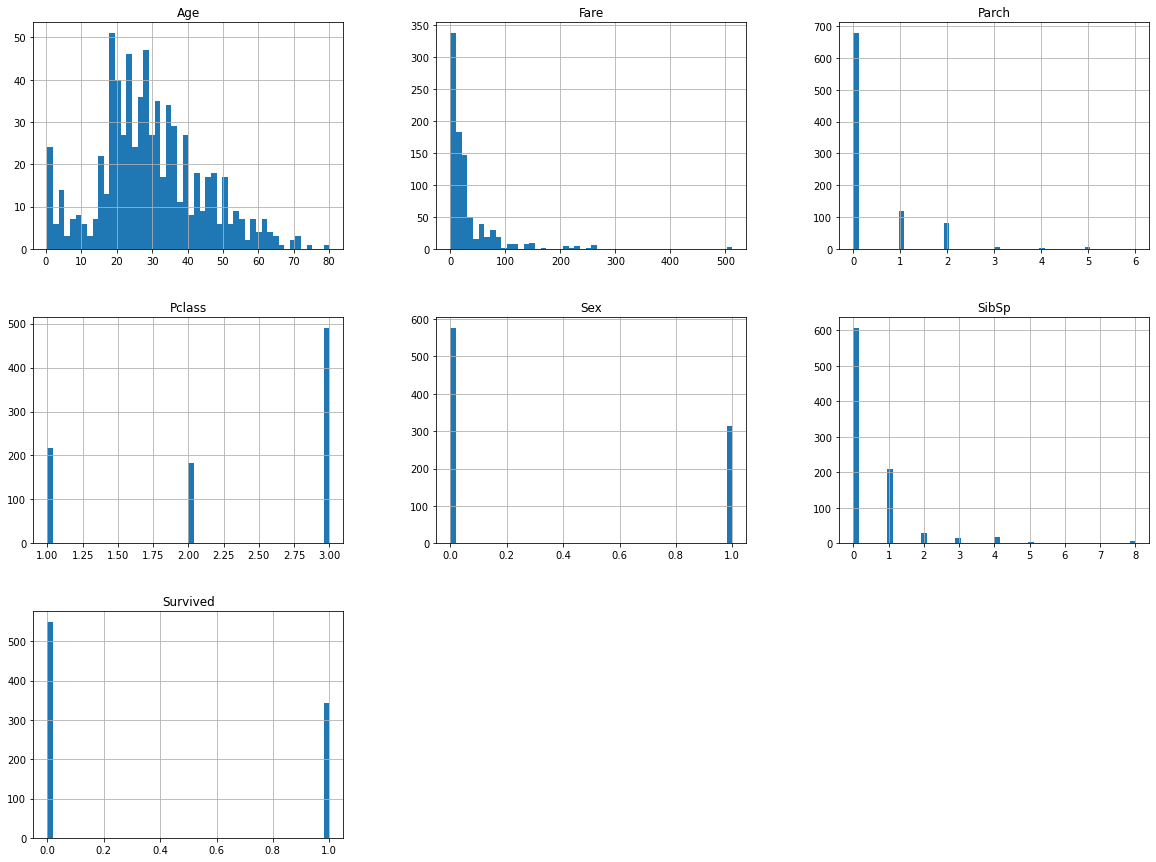

In [17]:
full.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


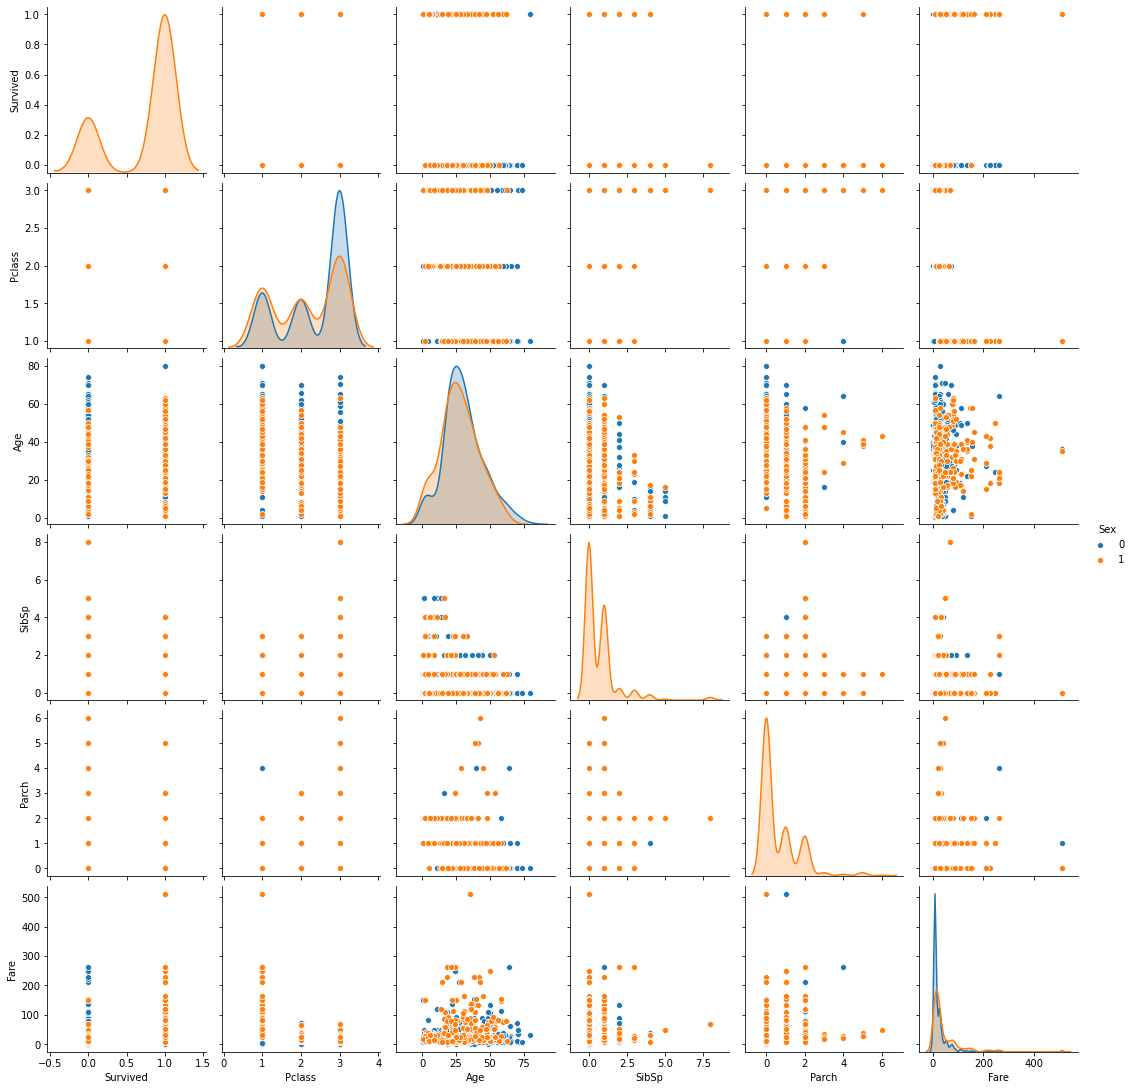

In [18]:
sns.pairplot(full, hue='Sex', kind='scatter')

AttributeError: 'PathCollection' object has no property 'hue'

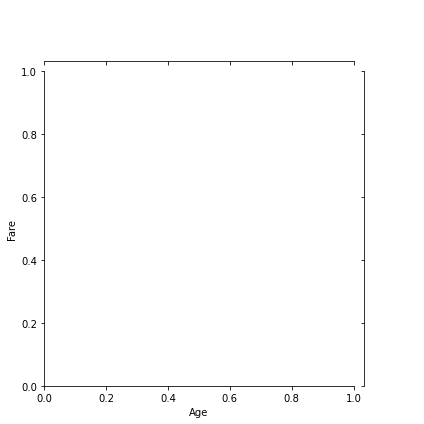

In [19]:
sns.jointplot(data=full, x="Age", y="Fare", hue="Sex")

In [ ]:
sns.jointplot(data=full, x="Age", y="Fare", kind='reg')

### Erkenntnis:
Es scheint einige Ausreißer zu geben, die im Folgenden genauer analysiert werden:

In [20]:
full.loc[full['Fare']>400, :]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,1,35.0,0,0,512.3292,C
679,1,1,0,36.0,0,1,512.3292,C
737,1,1,0,35.0,0,0,512.3292,C


Wir gehen davon aus, dass die 4stelligen Nachkommastellen aufgrund von Währungsumrechnung enstanden sind.

Die Preise scheinen aber im Gesamtkontext realistisch zu sein, deshalb werden sie beibehalten.

In [21]:
full.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000


Wir haben jetzt verstanden, dass in Fare scheinbar nicht nur der Ticket-Preis mit einzugehen scheint, sondern auch die Anzahl der Reisenden, die unter einer Ticketnummer gebucht wurden. Durch Zusammenführen des Train- und Testdatensatzes, könnte der Count der jeweilig selben Ticketnummer ermittelt werden und die Fare durch diese Zahl geteilt werden. Somit würde sich ein Preis pro Reisender ergeben, welche wiederum ein guter Prädiktor für unser Modell sein könnte. Aus Zeitgründen "begnügen" wir uns aktuell mit der Preisklasse (Pclass).

In [23]:
full.drop(columns='Fare', inplace=True)
full

KeyError: "['Fare'] not found in axis"

In [26]:
full.to_csv(PATH+'full.csv',index=False)

#### ab hier sind wir in unsere Entwicklungsumgebung gesprungen.